CMOSÏùò NFET, PFET dataÏùò Gaussian Ìï®ÏàòÎ°ú Íµ¨ÌòÑ

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
################# CMOS Characteristics On-Currents
NFET_Ion_1=np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1=np.random.normal(loc=500, scale=150, size=100000)

################# CMOS Characteristics On-Currents (randn)
NFET_Ion_2=np.random.randn(100000)*100+600
PFET_Ion_2=np.random.randn(100000)*150+500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2' : NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

In [ ]:
DF_CMOS.head()

nFET-1      pFET-1      nFET-2      pFET-2
0  776.405235  427.430376  603.950990  740.860566
1  640.015721  693.208560  633.837761  335.793549
2  697.873798  480.518193  515.781681  688.755836
3  824.089320  470.288242  595.036772  718.713608
4  786.755799  449.826861  476.975464  456.169520

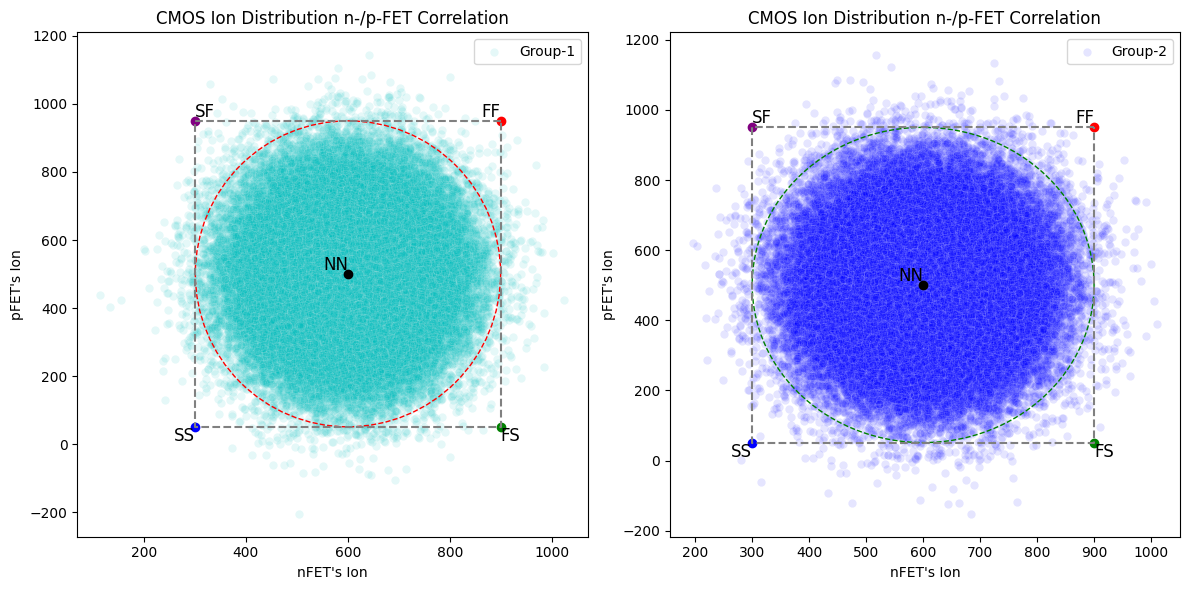

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)

# CMOS Characteristics On-Currents
NFET_Ion_1 = np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1 = np.random.normal(loc=500, scale=150, size=100000)

NFET_Ion_2 = np.random.randn(100000) * 100 + 600
PFET_Ion_2 = np.random.randn(100000) * 150 + 500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2': NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

# Scatter plot ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ï≤´ Î≤àÏß∏ subplot
ax1 = axes[0]
sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1', ax=ax1)
ax1.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax1.set_xlabel("nFET's Ion")
ax1.set_ylabel("pFET's Ion")
ax1.legend()

# Îëê Î≤àÏß∏ subplot
ax2 = axes[1]
sns.scatterplot(x=DF_CMOS['nFET-2'], y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2', ax=ax2)
ax2.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax2.set_xlabel("nFET's Ion")
ax2.set_ylabel("pFET's Ion")
ax2.legend()

# Median Î∞è Mean Í≥ÑÏÇ∞
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()

sigma3_1 = 3*DF_CMOS['nFET-1'].std(), 3*DF_CMOS['pFET-1'].std()
sigma3_2 = 3*DF_CMOS['nFET-2'].std(), 3*DF_CMOS['pFET-2'].std()

# Deviation Contour Plot
def plot_3sigma(ax, mean, cov, sigma3, color):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]  # eigenvectorsÏùò ÏàúÏÑúÎ•º Î≥ÄÍ≤Ω

    std_deviation = np.sqrt(eigenvalues) * 3

    ### Corner Points
    FF = (mean[0] + sigma3[0], mean[1] + sigma3[1])
    SS = (mean[0] - sigma3[0], mean[1] - sigma3[1])
    FS = (mean[0] + sigma3[0], mean[1] - sigma3[1])
    SF = (mean[0] - sigma3[0], mean[1] + sigma3[1])
    NN = (mean[0], mean[1])

    ellipse = Ellipse(xy=mean, width=std_deviation[0] * 2, height=std_deviation[1] * 2,
                      angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])),
                      edgecolor=color, fc='None', lw=1, linestyle='--')
    ax.add_patch(ellipse)

    # NN, FF, SS, FS, SF Corner Points Plot
    ax.plot(FF[0], FF[1], 'o', color='red')
    ax.text(FF[0], FF[1], 'FF', fontsize=12, ha='right', va='bottom')

    ax.plot(SS[0], SS[1], 'o', color='blue')
    ax.text(SS[0], SS[1], 'SS', fontsize=12, ha='right', va='top')

    ax.plot(FS[0], FS[1], 'o', color='green')
    ax.text(FS[0], FS[1], 'FS', fontsize=12, ha='left', va='top')

    ax.plot(SF[0], SF[1], 'o', color='purple')
    ax.text(SF[0], SF[1], 'SF', fontsize=12, ha='left', va='bottom')

    # Nominal Corner Plot
    ax.plot(NN[0], NN[1], 'o', color='black')
    ax.text(NN[0], NN[1], 'NN', fontsize=12, ha='right', va='bottom')

    # Corner Box Plot
    rect_x = [FF[0], SF[0], SS[0], FS[0], FF[0]]
    rect_y = [FF[1], SF[1], SS[1], FS[1], FF[1]]
    ax.plot(rect_x, rect_y, linestyle='--', color='gray')

# 3ÏãúÍ∑∏Îßà Î≤îÏúÑ Í≥ÑÏÇ∞ Î∞è Í∑∏Î¶¨Í∏∞
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)


plot_3sigma(ax1, mean_1, cov_1, sigma3_1, 'red')  # Ï≤´ Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞
plot_3sigma(ax2, mean_2, cov_2, sigma3_2, 'green')  # Îëê Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞

plt.tight_layout()
plt.show()


In [ ]:
print(mean_1)

(600.1576700508124, 500.76398619849436)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)

# CMOS Characteristics On-Currents
NFET_Ion_1 = np.random.normal(loc=600, scale=150, size=100000)
PFET_Ion_1 = np.random.normal(loc=500, scale=100, size=100000)

NFET_Ion_2 = np.random.randn(100000) * 150 + 600
PFET_Ion_2 = np.random.randn(100000) * 100 + 500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2': NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

# Scatter plot ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ï≤´ Î≤àÏß∏ subplot
ax1 = axes[0]
sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1', ax=ax1)
ax1.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax1.set_xlabel("nFET's Ion")
ax1.set_ylabel("pFET's Ion")
ax1.legend()

# Îëê Î≤àÏß∏ subplot
ax2 = axes[1]
sns.scatterplot(x=DF_CMOS['nFET-2'], y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2', ax=ax2)
ax2.set_title('CMOS Ion Distribution n-/p-FET Correlation')
ax2.set_xlabel("nFET's Ion")
ax2.set_ylabel("pFET's Ion")
ax2.legend()

# Median Î∞è Mean Í≥ÑÏÇ∞
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()

sigma3_1 = 3*DF_CMOS['nFET-1'].std(), 3*DF_CMOS['pFET-1'].std()
sigma3_2 = 3*DF_CMOS['nFET-2'].std(), 3*DF_CMOS['pFET-2'].std()

# Deviation Contour Plot
def plot_3sigma(ax, mean, cov, sigma, color):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]  # eigenvectorsÏùò ÏàúÏÑúÎ•º Î≥ÄÍ≤Ω

    std_deviation = np.sqrt(eigenvalues) * 3

    ### Corner Points
    FF = (mean[0] + sigma[0], mean[1] + sigma[1])
    SS = (mean[0] - sigma[0], mean[1] - sigma[1])
    FS = (mean[0] + sigma[0], mean[1] - sigma[1])
    SF = (mean[0] - sigma[0], mean[1] + sigma[1])
    NN = (mean[0], mean[1])

    ellipse = Ellipse(xy=mean, width=std_deviation[0] * 2, height=std_deviation[1] * 2,
                      angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])),
                      edgecolor=color, fc='None', lw=1, linestyle='--')
    ax.add_patch(ellipse)

    # NN, FF, SS, FS, SF Corner Points Plot
    ax.plot(FF[0], FF[1], 'o', color='red')
    ax.text(FF[0], FF[1], 'FF', fontsize=12, ha='right', va='bottom')

    ax.plot(SS[0], SS[1], 'o', color='blue')
    ax.text(SS[0], SS[1], 'SS', fontsize=12, ha='right', va='top')

    ax.plot(FS[0], FS[1], 'o', color='green')
    ax.text(FS[0], FS[1], 'FS', fontsize=12, ha='left', va='top')

    ax.plot(SF[0], SF[1], 'o', color='purple')
    ax.text(SF[0], SF[1], 'SF', fontsize=12, ha='left', va='bottom')

    # Nominal Corner Plot
    ax.plot(NN[0], NN[1], 'o', color='black')
    ax.text(NN[0], NN[1], 'NN', fontsize=12, ha='right', va='bottom')

    # Corner Box Plot
    rect_x = [FF[0], SF[0], SS[0], FS[0], FF[0]]
    rect_y = [FF[1], SF[1], SS[1], FS[1], FF[1]]
    ax.plot(rect_x, rect_y, linestyle='--', color='gray')

# 3ÏãúÍ∑∏Îßà Î≤îÏúÑ Í≥ÑÏÇ∞ Î∞è Í∑∏Î¶¨Í∏∞
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)


plot_3sigma(ax1, mean_1, cov_1, sigma3_1, 'red')  # Ï≤´ Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞
plot_3sigma(ax2, mean_2, cov_2, sigma3_2, 'green')  # Îëê Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

np.random.seed(0)
################# CMOS Characteristics On-Currents
NFET_Ion_1=np.random.normal(loc=600, scale=100, size=100000)
PFET_Ion_1=np.random.normal(loc=500, scale=150, size=100000)

################# CMOS Characteristics On-Currents (randn)
NFET_Ion_2=np.random.randn(100000)*100+600
PFET_Ion_2=np.random.randn(100000)*150+500

DF_CMOS = pd.DataFrame({
    'nFET-1': NFET_Ion_1, 'pFET-1': PFET_Ion_1,
    'nFET-2' : NFET_Ion_2, 'pFET-2': PFET_Ion_2
})

# Scatter plot ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = plt.gca()  # Ï≤´ Î≤àÏß∏ subplotÏùò Ï∂ï Í∞ÄÏ†∏Ïò§Í∏∞
sns.scatterplot(x=DF_CMOS['nFET-1'] , y=DF_CMOS['pFET-1'], alpha=0.1, color='c', label='Group-1')
plt.title('CMOS Ion Distribution n-/p-FET Correlation')
plt.xlabel("nFET's Ion")
plt.ylabel("pFET's Ion")
plt.legend()

plt.subplot(1, 2, 2)
ax2 = plt.gca()  # Ï≤´ Î≤àÏß∏ subplotÏùò Ï∂ï Í∞ÄÏ†∏Ïò§Í∏∞
sns.scatterplot(x=DF_CMOS['nFET-2'] , y=DF_CMOS['pFET-2'], alpha=0.1, color='b', label='Group-2')
plt.title('CMOS Ion Distribution n-/p-FET Correlation')
plt.xlabel("nFET's Ion")
plt.ylabel("pFET's Ion")
plt.legend()

# Median Î∞è Mean Í≥ÑÏÇ∞
median_1 = DF_CMOS['nFET-1'].median(), DF_CMOS['pFET-1'].median()
median_2 = DF_CMOS['nFET-2'].median(), DF_CMOS['pFET-2'].median()

mean_1 = DF_CMOS['nFET-1'].mean(), DF_CMOS['pFET-1'].mean()
mean_2 = DF_CMOS['nFET-2'].mean(), DF_CMOS['pFET-2'].mean()

# 3ÏãúÍ∑∏Îßà Î≤îÏúÑÏóê Ìï¥ÎãπÌïòÎäî ÌÉÄÏõê Í∑∏Î¶¨Í∏∞
def plot_3sigma(ax, mean, cov, color):
    sigma_x = np.sqrt(cov[0, 0])
    sigma_y = np.sqrt(cov[1, 1])
    sigma_xy = cov[0, 1]

    theta = np.arctan2(2 * sigma_xy, (sigma_x**2 - sigma_y**2)) / 2

    width = 2 * np.sqrt(2 * np.log(2) * (sigma_x**2 + sigma_y**2 +
                                         np.sqrt((sigma_x**2 - sigma_y**2)**2 + (2*sigma_xy)**2)))
    height = 2 * np.sqrt(2 * np.log(2) * (sigma_x**2 + sigma_y**2 -
                                          np.sqrt((sigma_x**2 - sigma_y**2)**2 + (2*sigma_xy)**2)))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta),
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)

# 3ÏãúÍ∑∏Îßà Î≤îÏúÑ Í≥ÑÏÇ∞ Î∞è Í∑∏Î¶¨Í∏∞
cov_1 = np.cov(DF_CMOS[['nFET-1', 'pFET-1']], rowvar=False)
cov_2 = np.cov(DF_CMOS[['nFET-2', 'pFET-2']], rowvar=False)

plot_3sigma(ax1, mean_1, cov_1, 'red')  # Ï≤´ Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞
plot_3sigma(ax2, mean_2, cov_2, 'green') # Îëê Î≤àÏß∏ subplotÏóê ÌÉÄÏõê Í∑∏Î¶¨Í∏∞

plt.tight_layout()
plt.show()




plot_3sigma Ìï®Ïàò Ï†ïÏùò: <br>

Ïù¥ Ìï®ÏàòÎäî ÌÉÄÏõêÏùÑ Í∑∏Î¶¨ÎäîÎç∞ ÏÇ¨Ïö© <br>
Ìï®ÏàòÎäî ÎÑ§ Í∞úÏùò Îß§Í∞úÎ≥ÄÏàòÎ•º Í∞ÄÏßê: <br>
ax: ÌÉÄÏõêÏùÑ Í∑∏Î¶¥ ÏÑúÎ∏åÌîåÎ°ØÏùò Ï∂ï <br>
mean: ÌÉÄÏõêÏùò Ï§ëÏã¨ Ï¢åÌëú. <br>
cov: Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨. <br>
color: ÌÉÄÏõêÏùò ÏÑ† ÏÉâÏÉÅ. <br>
Ìï®Ïàò ÎÇ¥ÏóêÏÑúÎäî Îã§ÏùåÏùÑ ÏàòÌñâ: <br>
np.linalg.eigh(cov)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò Í≥†Ïú†Í∞íÍ≥º Í≥†Ïú†Î≤°ÌÑ∞Î•º Í≥ÑÏÇ∞ <br>
Í≥†Ïú†Í∞íÏùÑ ÌÅ¨Í∏∞ÏàúÏúºÎ°ú Ï†ïÎ†¨. <br>
Í≥†Ïú†Í∞íÏóê 3ÏùÑ Í≥±Ìïú ÌõÑ, Ìï¥Îãπ Í∞íÏùÑ ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÏÇ¨Ïö©ÌïòÏó¨ ÌÉÄÏõêÏùò ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞. <br>
Ellipse Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÏó¨ ÌÉÄÏõêÏùÑ Í∑∏Î¶º <br>
cov_1 Î∞è cov_2 Í≥ÑÏÇ∞: <br>

np.cov Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÅÍ∞ÅÏùò CMOS ÌäπÏÑ± Î≥ÄÏàòÏóê ÎåÄÌïú Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÑ Í≥ÑÏÇ∞ <br>
plot_3sigma Ìï®Ïàò Ìò∏Ï∂ú: <br>

Í∞Å ÏÑúÎ∏åÌîåÎ°ØÏóê ÎåÄÌï¥ plot_3sigma Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ 3ÏãúÍ∑∏Îßà Î≤îÏúÑÏùò ÌÉÄÏõêÏùÑ Í∑∏Î¶º <br>
Í∞Å Ìò∏Ï∂úÏóêÏÑúÎäî Í∞ÅÍ∞ÅÏùò subplotÏùò Ï∂ï ax1 Î∞è ax2, Ìï¥Îãπ subplotÏùò ÌäπÏÑ± Î≥ÄÏàòÏóê ÎåÄÌïú ÌèâÍ∑†Í∞í mean_1 Î∞è mean_2, Í∑∏Î¶¨Í≥† Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ cov_1 Î∞è cov_2Í∞Ä Ï†ÑÎã¨ <br>
Îëê Í∞úÏùò subplotÏóê ÎåÄÌï¥ Í∞ÅÍ∞Å Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÌÉÄÏõêÏù¥ Í∑∏Î†§Ïßê. <br>

ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌëúÏ§ÄÌòïÌÉúÏùò ÌÉÄÏõêÏùò Î∞©Ï†ïÏãù:
(x - h)^2 / a^2 + (y - k)^2 / b^2 = 1

(h,k)Îäî ÌÉÄÏõêÏùò Ï§ëÏã¨Ï†êÏù¥Í≥†, <br>
ùëé: x-Ï∂ï Î∞©Ìñ•Ïùò Î∞òÏ∂ïÍ∏∏Ïù¥(ÌÉÄÏõêÏùò Í∞ÄÎ°ú Î∞òÏßÄÎ¶Ñ), <br>
ùëè: y-Ï∂ï Î∞©Ìñ•Ïùò Î∞òÏ∂ïÍ∏∏Ïù¥(ÌÉÄÏõêÏùò ÏÑ∏Î°ú Î∞òÏßÄÎ¶Ñ) <br>
Ïù¥Î†áÍ≤å ÌëúÌòÑÎêú ÌÉÄÏõêÏùò Î∞©Ï†ïÏãùÏóêÏÑú ùëéÏôÄ ùëèÍ∞Ä Í∞ôÏúºÎ©¥, ÌÉÄÏõêÏùÄ Ïõê. <br>

Ïù¥Îü¨Ìïú ÌëúÏ§ÄÌòïÌÉúÏùò ÌÉÄÏõê Î∞©Ï†ïÏãùÏóêÏÑú ùëéÏôÄ ùëèÎäî ÌÉÄÏõêÏùò ÌÅ¨Í∏∞ÏôÄ ÌòïÌÉúÎ•º Í≤∞Ï†ïÌïòÎ©∞, (‚Ñé,ùëò)Îäî ÌÉÄÏõêÏùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ <br>

In [ ]:
DF_CMOS.head()

nFET-1      pFET-1      nFET-2      pFET-2
0  776.405235  427.430376  603.950990  740.860566
1  640.015721  693.208560  633.837761  335.793549
2  697.873798  480.518193  515.781681  688.755836
3  824.089320  470.288242  595.036772  718.713608
4  786.755799  449.826861  476.975464  456.169520

In [ ]:
# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 3-sigma boundary Í≥ÑÏÇ∞
nfet1_mean, nfet1_std = DF_CMOS['nFET-1'].mean(), DF_CMOS['nFET-1'].std()
pfet1_mean, pfet1_std = DF_CMOS['pFET-1'].mean(), DF_CMOS['pFET-1'].std()
nfet2_mean, nfet2_std = DF_CMOS['nFET-2'].mean(), DF_CMOS['nFET-2'].std()
pfet2_mean, pfet2_std = DF_CMOS['pFET-2'].mean(), DF_CMOS['pFET-2'].std()

nfet1_upper, nfet1_lower = nfet1_mean + 3 * nfet1_std, nfet1_mean - 3 * nfet1_std
pfet1_upper, pfet1_lower = pfet1_mean + 3 * pfet1_std, pfet1_mean - 3 * pfet1_std
nfet2_upper, nfet2_lower = nfet2_mean + 3 * nfet2_std, nfet2_mean - 3 * nfet2_std
pfet2_upper, pfet2_lower = pfet2_mean + 3 * pfet2_std, pfet2_mean - 3 * pfet2_std

# subplot 1
#sns.kdeplot(data=DF_CMOS, x='nFET-1', y='pFET-1', ax=axes[0], fill=True)
axes[0].axvline(nfet1_upper, color='r', linestyle='--', linewidth=1)
axes[0].axvline(nfet1_lower, color='r', linestyle='--', linewidth=1)
axes[0].axhline(pfet1_upper, color='r', linestyle='--', linewidth=1)
axes[0].axhline(pfet1_lower, color='r', linestyle='--', linewidth=1)
axes[0].set_title('nFET-1 vs pFET-1')

# subplot 2
#sns.kdeplot(data=DF_CMOS, x='nFET-2', y='pFET-2', ax=axes[1], fill=True)
axes[1].axvline(nfet2_upper, color='r', linestyle='--', linewidth=1)
axes[1].axvline(nfet2_lower, color='r', linestyle='--', linewidth=1)
axes[1].axhline(pfet2_upper, color='r', linestyle='--', linewidth=1)
axes[1].axhline(pfet2_lower, color='r', linestyle='--', linewidth=1)
axes[1].set_title('nFET-2 vs pFET-2')

plt.tight_layout()
plt.show()

In [ ]:

############################################################################################## sns.kdeplotÏùò ÏòàÏ†ú

import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
data = {
    'nFET-1': [1, 2, 3, 4, 5],
    'pFET-1': [2, 3, 5, 7, 6]
}
DF_CMOS = pd.DataFrame(data)

# figureÏôÄ axes ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# KDE plot Í∑∏Î¶¨Í∏∞
sns.kdeplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], ax=axes[0], fill=True)                                      # ÏïÑÎûòÏ≤òÎüºÌï¥ÎèÑ Í∞ÄÎä• ÎëòÎã§ Í∞ÄÎä•
#sns.kdeplot(data=DF_CMOS, x='nFET-1', y='pFET-1', ax=axes[0], fill=True)

# scatter plot Í∑∏Î¶¨Í∏∞
#sns.scatterplot(x=DF_CMOS['nFET-1'], y=DF_CMOS['pFET-1'], alpha=0.2, color='c', label='Group-1', ax=axes[1])     # ÏïÑÎûòÏ≤òÎüºÌï¥ÎèÑ Í∞ÄÎä• ÎëòÎã§ Í∞ÄÎä•
sns.scatterplot(data=DF_CMOS, x='nFET-1', y='pFET-1', alpha=0.2, color='c', label='Group-1', ax=axes[1])

plt.show()
